# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **The above problem is classification. It is so because the query(student here), has to be classified as "needing intervention" or "no need for intervention"(According to what we had predicted "passed" or "failed"). We have discrete outputs. More precisely, we are dealing with a binary classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
print student_data.head()

Student data read successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3        6   
1  ...        yes       no       5         3      3    1    1      3        4   
2  ...        yes       no       4         3      2    2    3      3       10   
3  ...        yes      yes       3         2      2    1    1      5        2   
4  ...         no       no       4         3      2    1    2      5        4   

  passed  
0     no  
1 

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = len(student_data['sex'])

# TODO: Calculate number of features
n_features = len(student_data.columns) - 1

# TODO: Calculate passing students
n_passed = len(student_data[student_data['passed'] == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data['passed']=='no'])

# TODO: Calculate graduation rate
grad_rate = (float(n_passed)/n_students)* 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]
#
# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [12]:
# TODO: Import any additional functionality you may need here

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.76,random_state=1 ) 

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **<br/>
1.**SVMs**:- SVMs tend to be slow with a large training data and are bad with a lot of noise in the data. But considering that the no of training examples are 300 (which are comparatively less), we can use a svm. If the data is linearly seperable, a linear kernel on the svm will do very well.<br/> General explanation and pros and cons of SVMs are:-
+ SVMs are used for image clssification(Why?). It is so because they present a large margin classifier. Thus, a zebra will be identified as zebra and a horse would not be identified as a zebra. This is so because the confidence of SVMs are greater since they have a decision boundary that has a large margin between the two classes. 
+ It works really well with clear margin of separation
+ It is effective in high dimensional spaces.
+ It is effective in cases where number of dimensions is greater than the number of samples.
+ It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient. Thus it captures few important examples well.
+ SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

<br/>Some Industry applications and why svm can be suitable for the problem at hand:-
+ SVMs are helpful in text and hypertext categorization as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive settings. Thus from this point, one can derive that their is less need of training data for SVMs. Since our example uses just 300 examples, an SVM would be a robust classifier.
+ Hand-Written digit recognization is precisely done using svms. When it comes to the real world, there are many ways in which people draw digits. Now, svms are large-margin classifiers, using only some very important vectors for drawing margin. Thus, they would capture the most important examples even with a small amount of data. Thus, intuituvely they are good for our problem as we can capture most important distinctions with the use of SVMs.
+ Image Classification. They present a good decision boundary and thus a clear confident classifier
+ Protein sequences are assigned to functional families using SVMs. There are 2 million proteins in just our body. Now, their classification problem was solved using SVMs. It was so because a reasonably small dataset for training could present a good model. Plus the no of features was comparatively more. Thus an svm would do well for our dataset too as no of features are 48 and training examples are 300.

2.**Instance Based Methods like KNN**:- Instance based methods like KNN can also do well in fitting a dataset of less size as finding the nearest few neighbours corresponding to the query may be found and the corresponding label with the maximum vote can be returned.<br/>
General Applications of and explainations about KNN are:-
+ Works well provided there is lots of data and the distance function is good. Thus we need to have a data(we can give it a try with 300 examples)
+ It takes more time during test time or query time.
+ finding a reasonable distance function might take effort.(a lot of)
+ Storage of data is a big problem with large datasets in KNN.

<br/>Some of its industry applications and why it can be suitable for the problem at hand:
+ K Nearest Neighbours is sometimes used in Auto-summarization problems. The graph contains each sentence as a node and links between sentences according to some distance metric. Then one can link each sentence to its k-nearest neighbors and one can even use k=#total_nodes.
However, this points out that we have to get a reasonably large amount of data. However, lets give it a try for our dataset. 

+ A drawback of the basic "majority voting" classification occurs when the class distribution is skewed. That is, examples of a more frequent class tend to dominate the prediction of the new example, because they tend to be common among the k nearest neighbors due to their large number. However our class is skewed. So, it might not be a suitable one. (But lets give it a try however :) )

3.**Decision Trees**:- Though the no of features are more, a less depth decision tree can be used to determine the outcome of the classification problem and thus, prevent overfitting. Moreover, using a decision tree is more explanatory than using Neural Nets or logistic regression classification technique.
+ The Decision Trees are great for explanation. It is like asking questions and then moving with the best feature. 
+ It is like a greedy algorithm, splitting with the best current feature to split (using information gain). 
+ Among the major decision tree disadvantages are its complexity. Decision trees are easy to use compared to other decision-making models, but preparing decision trees, especially large ones with many branches, are complex and time-consuming affairs.
+ If the max_depth is not set properly, then the model may overfit.
+ Have value even with little hard data. Important insights can be generated based on experts describing a situation (its alternatives, probabilities, and costs) and their preferences for outcomes.
+ Allow the addition of new possible scenarios.
+ Nonlinear relationships between parameters do not affect tree performance.
+ Cons:- For data including categorical variables with different number of levels, information gain in decision trees are biased in favor of those attributes with more levels.
+ Calculations can get very complex particularly if many values are uncertain and/or if many outcomes are linked.

<br/>Some of its industry applications and why it can be suitable for the problem at hand:
+ As discussed in the pros and cons section, decision trees allow for addition of new possible scenarios easily. 
+ Moreover, in our case, one feature might be more important than other features. Decision Trees capture feature importance( there are 48 features). Thus decision tree may perform implicit feature selection.(out of our 48 features).

+ Object recognition: Tree based classification has been used recently for recognizing three dimensional objects and for high level vision
+ Decision trees have been used for the detection of physical particles. 
+ Financial Analysis: They have been used for determining attractiveness of user in finance. 
+ Thus, the decision trees can capture more important features as in problems like financial analysis or 3d object recongnization, some major properties have to be captured for an approximate good classification.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [13]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [14]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# TODO: Initialize the three models

#trying first with a linear svm
clf_A = SVC(kernel='rbf',random_state=2)

clf_B = DecisionTreeClassifier(random_state=1)
clf_C = KNeighborsClassifier()

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_A,clf_B,clf_C]:
    for X, y in zip([X_train_100, X_train_200, X_train_300],[y_train_100, y_train_200, y_train_300]):
        train_predict(clf, X, y, X_test, y_test)
        print ""

Training a SVC using a training set size of 100. . .
Trained model in 0.0022 seconds
Made predictions in 0.0014 seconds.
F1 score for training set: 0.8591.
Made predictions in 0.0014 seconds.
F1 score for test set: 0.8333.

Training a SVC using a training set size of 200. . .
Trained model in 0.0061 seconds
Made predictions in 0.0045 seconds.
F1 score for training set: 0.8581.
Made predictions in 0.0023 seconds.
F1 score for test set: 0.8408.

Training a SVC using a training set size of 300. . .
Trained model in 0.0154 seconds
Made predictions in 0.0144 seconds.
F1 score for training set: 0.8584.
Made predictions in 0.0041 seconds.
F1 score for test set: 0.8462.

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0014 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.6829.

Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVM with linear kernel.**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100             |     0.0072                    |  0.0009                    | 0.8529                 |  0.7360               |
| 200               |        0.0203         |          0.0026              |       0.8303           |       0.7463          |
| 300               |           0.0568              |     0.0054                   |      0.8289            |    0.7424      |

** Classifer 2 - Decision Tree Classifier (without changing the max_depth parameter and using a linear svm)**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0014                   |   0.0003                     |       1.000           |          0.6829       |
| 200               |     0.0049            |     0.0004                |     1.000             |           0.6984|
| 300               |   0.0049                      |             0.0004           |      1.000            |     0.7023     |

** Classifer 3 - K-Nearest Neighbors**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |            0.0010             |                 0.0021       |    0.7883              |       0.7727          |
| 200               |    0.0027                     |    0.0047                   |        0.8345          |           0.7971      |
| 300               |     0.0012                    |            0.0101            |            0.8558     |        0.7681         |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **Some points to be considered<br/>
**1. Maximum Dataset size: 300 and No of features: 48**<br/>
+ SVM:- Since we dont have much data, it is suitable to select an SVM (an SVM doesnot do well with large and noisy data). Plus since the no of features is 48, we do prevent overfitting on the data, since the F1 score shows this (on the train set). We can modify the svm by choosing a suitable kernel and suitable C and lambda.(presently linear kernel and default params are used).
+ Decision Tree:- The decision tree (without modifying the max_depth param) overfits the training data and is not suitable(F1 score of 1.000). However, modification of max_depth and other hyperparameters may improve the F1 score over the test set. For eg., setting max_depth to 5, increases final test F1 score (300 examples) to 0.8392.
+ KNN:- KNN is showing comparatively good F1 score comparatively but its improvement is not quite flexible.

**2. Training and Test time**<br/>
+ SVM:- If training and test time are a concern, then the training time of svm is quite higher than the decision tree and the KNN.
+ DecisionTree:- In comparision to the other classifiers, the DecisionTree Classifier offers less train and test times.
+ KNN: - Offers less train time but high test time(comparative to other models)

**3. Importance of features and the Complexity of the model**<br/>
+ SVM:- The complexity of the SVM being increased (choosing a correct kernel) can improve the F1 score. For example, the final test F1 score increases to arount 0.84 when rbf kernel is used. 
+ Decision Tree: Some features capture more information than others. In this case, we have 48 features which are quite many. Thus, using a proper max_depth for a decision tree might be useful and may improve our evaluation metric.
+ KNN: Treats all features equally and thus determines the class. Thus, since feature importance pays a major role, KNN might not be suitable.

Thus if training and test times are a concern, then Decision trees must be taken and then optimized to train a classifier (a good f1 score  can be obtained).
If not, an SVM with a proper kernel can be used to train a good accuracy classifier.
Thus considering points of complexity, cost, limited resources and performance, a DecisionTree Classifier is suitable.
However, if train and test times are not too much of a concern, a SVM with a proper kernel can be used.
Thus overall, since the train and test times donot show much difference, an SVM with a proper kernel can be used.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer**: SVMs are also known as large margin classifiers. It is so because they preserve a decision boundary that is quite far from both positive and negative examples. **An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.** <br/>
Why are they called Support Vector machines?<br/>
As stated in the course, only some examples prove to be sufficient in drawing the large margin decision boundary. Thus only some examples near the decision boundary can help (or support)in determining the boundary. Since they are large margin, they are more confident in comparision to other classifiers. Let us consider few examples:

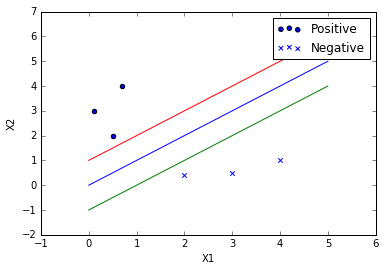

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.scatter([0.5,0.1,0.7],[2,3,4],marker='o')
plt.scatter([3,2,4],[0.5,0.4,1], marker='x')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["Positive", "Negative"])
x = np.linspace(0,5)
plt.plot(x, x)
plt.plot(x, x-1)
plt.plot(x, x+1)
plt.show()

An SVM would consider and create a large margin classfier(In this case the blue line is the best decision boundary chosed by the svm(approx)). Thus, the svm is quite popular as it handles the classification with much confidence. Also, with use of a kernel, an svm can also fit non-linear and complex models.

**Answer: (in non layman terms, in terms of how to increase model score)**<br/>The Support Vector Machines are called so since (if trained properly) only some important vectors can support in the creation of the model. Also, the SVM presents a large margin classifier. Thus the confidence with which an SVM works is higher in comparision to classifiers. Also, we have a small and noise-free(possibly) data and thus, an svm is suitable. Moreover, a suitable kernel can improve accuracy. <br/>
**How do we tune it**
+ gamma<br/>
As in the scikit learn documentation, 
>Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

Thus, the gamma value would decide how we allot importance to some examples in determining the decision boundary .

+ C<br/>
As in the scikit learn documentation, 
>The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

Thus, a lower C value would prevent overfitting on the training set.

+ Kernel<br/> 
The choice of a kernel determines closely how the decision boundary is. For example, a linear kernel will have only a linear boundary, an RBF(gaussian) kernel can create complex decision boundaries in order to fit a complex model. Thus, a proper kernel needs to be chosen.

Overall, in layman terms, an svm uses few important vectors in the training set and then uses those to present a large margin classifier.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [17]:
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# TODO: Create the parameters list you wish to tune
parameters = {'kernel':['rbf', 'linear', 'sigmoid'], 'C':[1,2,10]}

# TODO: Initialize the classifier
clf = SVC(random_state=1)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')
# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters

grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0092 seconds.
Tuned model has a training F1 score of 0.8584.
Made predictions in 0.0031 seconds.
Tuned model has a testing F1 score of 0.8462.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **The final model's F1 score for training and testing are<br/>
**After Tuning :**
+ Train Set: 0.8584
+ Test Set: 0.8462<br/>

**Before Tuning :**
+ Train Set: 0.8289
+ Test Set:0.7284

The F1 score for both the training as well as th testing set has increased. Fitting a proper model by using grid search cross validation increases both the train and the test f1 score. The train F1 score increased by 3.55% and the test F1 score increased by 16%.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.